In [3]:
# from PIL import ImageEnhance
# from PIL import Image
from PIL import ImageEnhance
import PIL
import skimage, skimage.io

In [4]:
import data, config, image
dataset = data.init_dataset()

Using TensorFlow backend.


 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'labels' = pandas.df('img_name','breed')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


In [7]:
# Import train+test data
img_dir = config.dataset_dir + 'train/'
img_name = img_dir + dataset.train[0]

## Image transformation

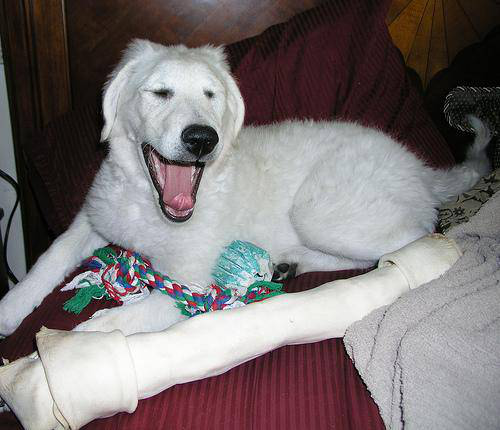

In [4]:
img = PIL.Image.open(img_name) # fill in directory
img2 = image.transform_image(img, sharpness=1, contrast=1, brightness=1)
#end_img.save('') # fill in directory
#     end_img.show()
img2

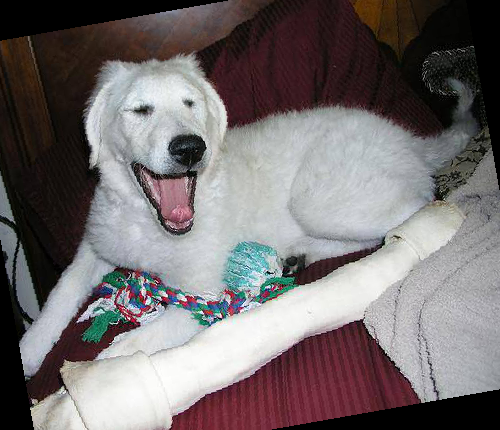

In [5]:
img2.rotate(10)

In [6]:
# convert PIL.Image to np.array
import numpy as np
a = np.array(img2.convert('RGB'))
a[0:2,0:2,:]

array([[[33, 28, 22],
        [32, 27, 21]],

       [[33, 28, 22],
        [32, 27, 21]]], dtype=uint8)

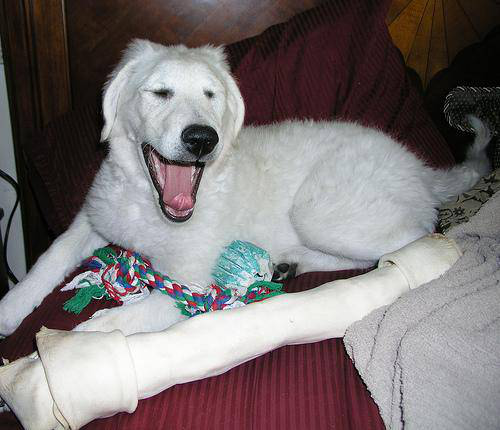

In [7]:
img_ = PIL.Image.fromarray(a)
img_

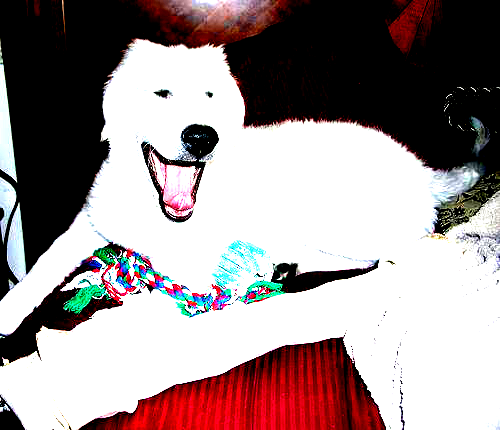

In [8]:
image.transform_image(img, contrast=2, sharpness=1, brightness=2)

In [9]:
img = image.transform_random(img)

m [array([1.01672393]), array([0.55933584]), array([0.40226623])]


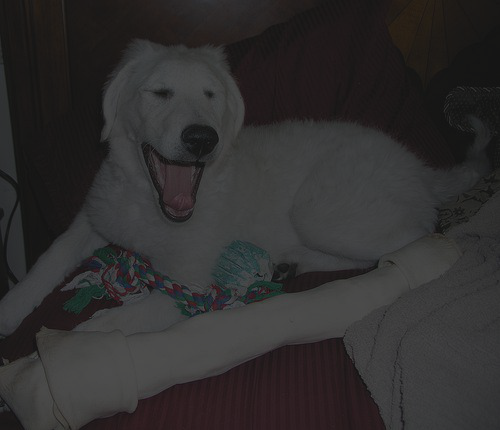

In [10]:
img

## Edge detection

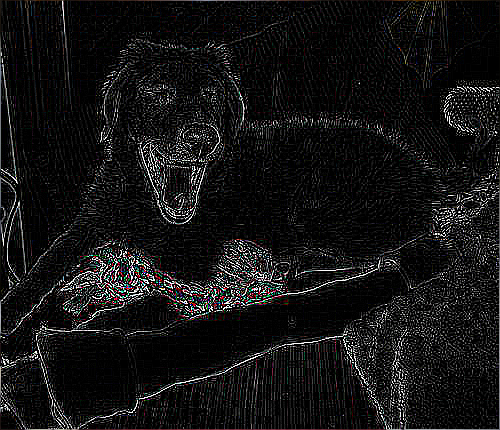

In [11]:
from PIL import Image, ImageFilter
import skimage.io

img = Image.open(img_name)
img = img.filter(ImageFilter.FIND_EDGES)
# skimage.io.imshow(image)
img

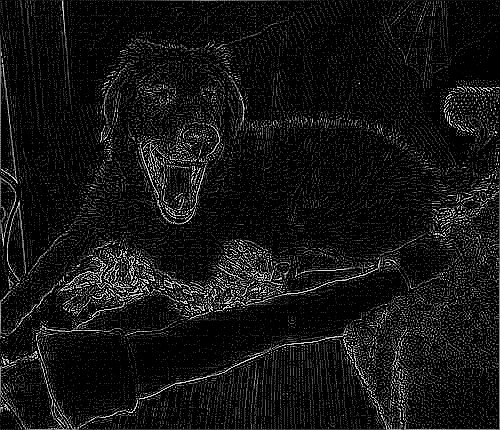

In [12]:
p = np.array(img.convert('P'))
PIL.Image.fromarray(p)

m [array([0.76237127]), array([0.46111075]), array([1.04027311])]
m [array([0.44292986]), array([0.45634119]), array([0.82520211])]


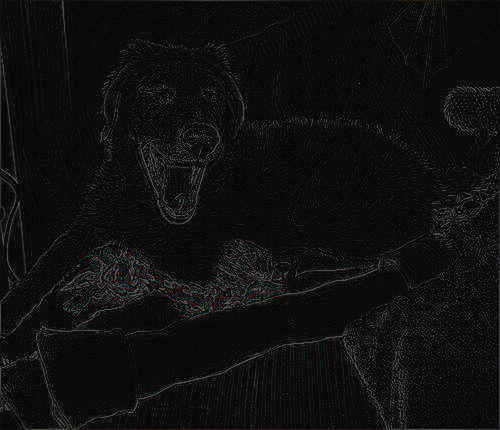

In [13]:
p_ = image.transform_random(img)
p_ = image.transform_random(img)
p_

In [14]:
p.shape

(430, 500)

In [15]:
i = np.array(Image.open(img_name).convert('RGB'))
i.shape

(430, 500, 3)

In [16]:
# np.column_stack((i,[p]))
p_ = p[:,:,np.newaxis]
super_img = np.append(i,p_,axis=2)
original = super_img[:,:,:3]
original.shape

(430, 500, 3)

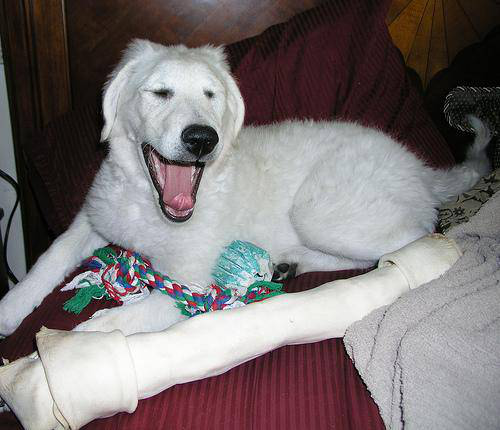

In [17]:
img = PIL.Image.fromarray(original)
img

## To Complex img
'Complex' img = img with as pixel values a vector [r,g,b,edge_value]

m [array([0.41756472]), array([3.67042565]), array([0.40000018])]


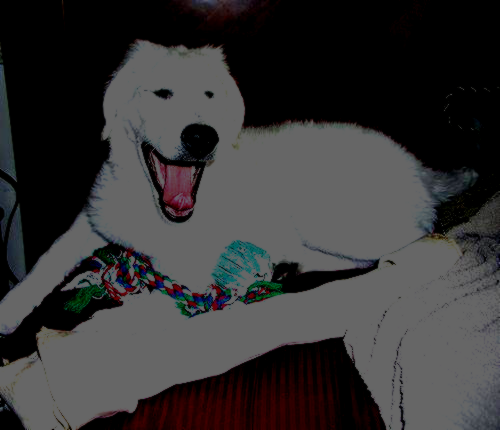

In [25]:
img = PIL.Image.fromarray(original)
img = image.to_np_array(img)
encoded = image.encode_img(img, mutate=True)
decoded = image.decode_img(encoded)
img = image.to_PIL(decoded)
img

# Rotate & auto-crop

In [28]:
img = PIL.Image.open(img_name)
image.to_np_array(img).shape

(430, 500, 3)

In [38]:
degree = -30
img2 = img
img2 = img2.rotate(degree)
current_dims = img2.getbbox() # bounding box :: (upper, top, right, lower)
dims = (443, 368)
dims = (500,250)
# resize (stretch)
img2 = img2.resize(dims, resample = PIL.Image.BILINEAR)

# box = [ (x,y) for x,y in four_xy ]
# img2.crop(box)
# img2 = Image.load(img2) # crop has lazy evaluation; force executing

# image_rotaded.close
# image_resized.save('./datasets/train_new/'+str(degree)+'_'+file_name, 'JPEG')
# image_resized.close
# image.close;
# img.close() # ???
image.to_np_array(img2).shape

(250, 500, 3)

In [42]:
img2.getbbox()

(0, 0, 500, 250)